# IDR to CNY, CAD, and MYR currency model

In [1]:
%run helper_functions_and_libraries.py
logging.set_verbosity(logging.ERROR)

In [2]:
df = pd.read_csv('currency_data_10_years.csv', parse_dates=['date'])

In [3]:
display(df.head())

,date,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
0,2013-05-01,12816.661099,9721.95011,99.794970,15125.789759,7884.025975,9991.932116,1573.729510,9637.238781,3196.705985,311.579294
1,2013-05-02,12696.355896,9727.31307,99.371194,15096.787469,7878.089194,9976.629029,1576.636811,9620.049518,3193.114711,311.787545
2,2013-05-03,12735.428571,9726.93828,98.682506,15125.784565,7879.444847,10024.671009,1576.977359,9628.439345,3201.788787,312.272389
3,2013-05-04,12758.622548,9729.21521,98.372041,15148.170100,7886.016560,10037.051582,1577.842772,9643.293465,3204.827462,313.177271
4,2013-05-05,12719.240307,9697.65758,97.852512,15097.625177,7859.545641,9999.337595,1572.747845,9623.460698,3195.832412,312.291932


In [4]:
df.isnull().sum()

date    0
EUR     0
USD     0
JPY     0
GBP     0
SGD     0
AUD     0
CNY     0
CAD     0
MYR     0
RUB     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,15734.162882,13626.586201,121.401374,18653.481260,10082.717169,10260.649080,2069.300203,10754.881120,3404.138908,231.530939
std,1028.194122,1215.902129,10.240113,1282.776928,714.681696,449.989173,140.321208,530.164824,173.826533,46.941534
min,12502.789487,9697.657580,94.607603,14719.776369,7717.296664,8937.081757,1572.747845,9357.856739,2975.634017,102.737302
25%,15022.483609,13190.926920,113.522422,17928.531116,9568.972790,9936.471898,1980.528819,10411.948518,3302.096195,201.594311
50%,15801.743633,13912.643820,120.609803,18781.087788,10247.419202,10276.735571,2091.106976,10746.358863,3423.539036,219.833077
75%,16463.962255,14384.106330,129.598188,19469.502233,10588.733799,10609.276367,2177.005363,11165.293022,3529.477813,237.545901
max,18035.467645,16644.718800,153.504275,22488.120204,11718.909446,11396.359940,2346.805612,12314.949757,3819.207831,384.795234


In [7]:
SPLIT_TIME = 3287
WINDOW_SIZE = 15
BATCH_SIZE = 91
SHUFFLE_BUFFER_SIZE = 1000

## CNY

In [8]:
cny_df = df[['date','CNY']]

In [9]:
display(cny_df.head())
display(cny_df.tail())

,date,CNY
0,2013-05-01,1573.729510
1,2013-05-02,1576.636811
2,2013-05-03,1576.977359
3,2013-05-04,1577.842772
4,2013-05-05,1572.747845


,date,CNY
3648,2023-04-27,2122.230600
3649,2023-04-28,2122.847288
3650,2023-04-29,2122.846296
3651,2023-04-30,2122.366433
3652,2023-05-01,2123.377747


In [10]:
times, series = parse_data_from_df(cny_df, 'CNY')

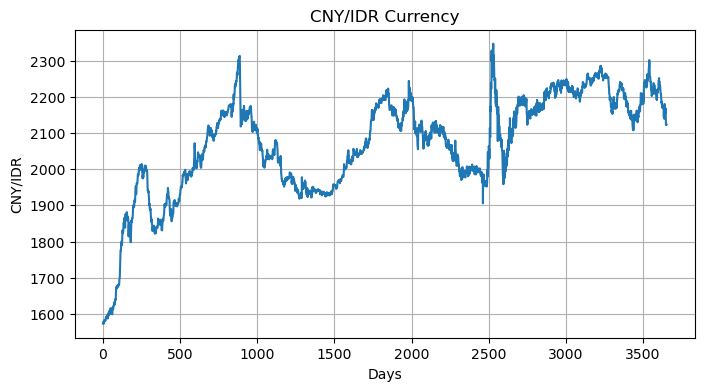

In [11]:
plt.figure(figsize=(8, 4))
plot_series(times, series, title="CNY/IDR Currency", xlabel="Days", ylabel="CNY/IDR")

In [12]:
# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(times, series, SPLIT_TIME, None)

In [13]:
train_set = windowed_dataset(series_train, 
                             window_size=WINDOW_SIZE, 
                             batch_size=BATCH_SIZE, 
                             shuffle_buffer=SHUFFLE_BUFFER_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosi

In [14]:
val_set = windowed_dataset(series_valid, 
                             window_size=WINDOW_SIZE, 
                             batch_size=BATCH_SIZE, 
                             shuffle_buffer=SHUFFLE_BUFFER_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosi

In [15]:
def create_model():
    
    # Build the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=[WINDOW_SIZE], activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ], name="model_cny")

    return model

In [16]:
# Test your uncompiled model
model = create_model()

# Print the model summary
model.summary()

# Check model compatibility
try:
    model.predict(train_set)
except:
    print("Your current architecture is incompatible with the windowed dataset, try adjusting it.")
else:
    print("Your current architecture is compatible with the windowed dataset! :)")

Model: "model_cny"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,417
Trainable params: 12,417
Non-trainable params: 0
_________________________________________________________________
36/36 [==============================] - 2s 55ms/step
Your current architecture is compatible with the windowed dataset! :)


In [17]:
# Get initial weights
init_weights = model.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [18]:
def adjust_learning_rate(dataset, model_to_train):
    
    model = model_to_train
    
    # Set the learning rate scheduler
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch / 20))
    
    # Select optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    # optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    
    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer, 
                  metrics=["mae"])
    
    # Train the model
    history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])
    
    return history

In [19]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set, model)

Epoch 1/100
36/36 [==============================] - 2s 7ms/step - loss: 256.8507 - mae: 256.0313 - lr: 0.0010
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 21.6736 - mae: 21.2241 - lr: 0.0011
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 15.5876 - mae: 15.3521 - lr: 0.0013
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 20.5090 - mae: 20.3874 - lr: 0.0014
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 27.0180 - mae: 26.9494 - lr: 0.0016
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 27.9223 - mae: 27.8718 - lr: 0.0018
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 26.5362 - mae: 26.4912 - lr: 0.0020
Epoch 8/100
36/36 [==============================] - 0s 8ms/step - loss: 22.3679 - mae: 22.3252 - lr: 0.0022
Epoch 9/100
36/36 [==============================] - 0s 9ms/step - loss: 19.4940 - mae: 19.4492 - lr: 0.0025
Epoch 10/100
36/3

36/36 [==============================] - 0s 7ms/step - loss: 2222.7048 - mae: 101.7968 - lr: 4.4668
Epoch 75/100
36/36 [==============================] - 0s 7ms/step - loss: 2059.7720 - mae: 110.7279 - lr: 5.0119
Epoch 76/100
36/36 [==============================] - 0s 7ms/step - loss: 1909.7233 - mae: 114.2905 - lr: 5.6234
Epoch 77/100
36/36 [==============================] - 0s 7ms/step - loss: 1773.0841 - mae: 117.1263 - lr: 6.3096
Epoch 78/100
36/36 [==============================] - 0s 7ms/step - loss: 1632.8301 - mae: 105.3201 - lr: 7.0795
Epoch 79/100
36/36 [==============================] - 0s 7ms/step - loss: 1512.4120 - mae: 104.3414 - lr: 7.9433
Epoch 80/100
36/36 [==============================] - 0s 7ms/step - loss: 1413.5323 - mae: 118.4618 - lr: 8.9125
Epoch 81/100
36/36 [==============================] - 0s 7ms/step - loss: 1293.3453 - mae: 104.7704 - lr: 10.0000
Epoch 82/100
36/36 [==============================] - 0s 7ms/step - loss: 1195.9865 - mae: 107.3892 - lr: 11

In [20]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [21]:
def compile_model(dataset, model_to_train):
    
    model = model_to_train

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    history = model.fit(dataset,
                        verbose=1,
                        epochs=100,
                        validation_data=val_set)   

    return history

In [22]:
history = compile_model(train_set, model)

Epoch 1/100
36/36 [==============================] - 2s 15ms/step - loss: 1382.2504 - mae: 1381.2156 - val_loss: 785.0593 - val_mae: 784.0538
Epoch 2/100
36/36 [==============================] - 0s 9ms/step - loss: 246.0797 - mae: 245.0999 - val_loss: 17.0819 - val_mae: 16.1265
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 23.5230 - mae: 22.5911 - val_loss: 17.1263 - val_mae: 16.2181
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 15.0415 - mae: 14.1570 - val_loss: 16.8341 - val_mae: 15.9769
Epoch 5/100
36/36 [==============================] - 0s 9ms/step - loss: 14.5923 - mae: 13.7538 - val_loss: 17.0321 - val_mae: 16.2232
Epoch 6/100
36/36 [==============================] - 0s 9ms/step - loss: 14.7500 - mae: 13.9568 - val_loss: 16.1557 - val_mae: 15.3914
Epoch 7/100
36/36 [==============================] - 0s 9ms/step - loss: 14.3465 - mae: 13.5942 - val_loss: 16.1905 - val_mae: 15.4643
Epoch 8/100
36/36 [===========================

Epoch 61/100
36/36 [==============================] - 0s 10ms/step - loss: 9.6077 - mae: 9.5576 - val_loss: 10.8542 - val_mae: 10.8142
Epoch 62/100
36/36 [==============================] - 0s 10ms/step - loss: 9.8368 - mae: 9.7924 - val_loss: 11.3249 - val_mae: 11.2873
Epoch 63/100
36/36 [==============================] - 0s 10ms/step - loss: 9.7624 - mae: 9.7182 - val_loss: 11.2398 - val_mae: 11.2029
Epoch 64/100
36/36 [==============================] - 0s 11ms/step - loss: 10.2171 - mae: 10.1752 - val_loss: 11.1124 - val_mae: 11.0771
Epoch 65/100
36/36 [==============================] - 1s 11ms/step - loss: 9.2609 - mae: 9.2193 - val_loss: 10.3984 - val_mae: 10.3603
Epoch 66/100
36/36 [==============================] - 0s 10ms/step - loss: 9.4613 - mae: 9.4190 - val_loss: 10.5182 - val_mae: 10.4822
Epoch 67/100
36/36 [==============================] - 1s 11ms/step - loss: 9.3895 - mae: 9.3490 - val_loss: 10.2635 - val_mae: 10.2292
Epoch 68/100
36/36 [==============================] -

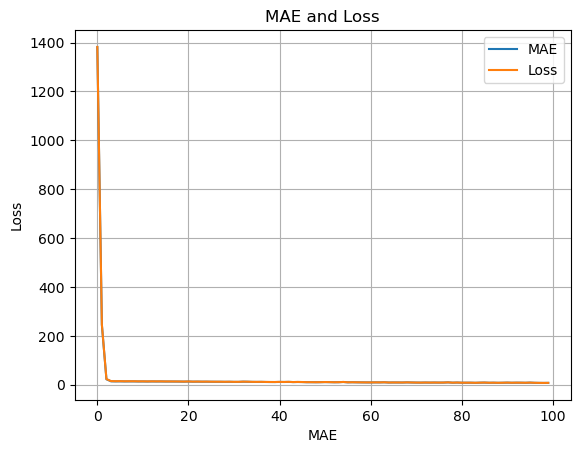

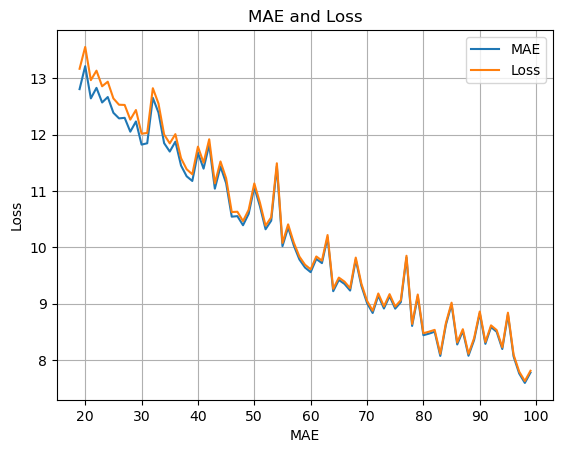

In [23]:
visualize_mae_loss(history)

In [24]:
pred_series = series[SPLIT_TIME-WINDOW_SIZE:-1]

In [25]:
forecast = model_forecast(model, pred_series, WINDOW_SIZE, BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 13ms/step


In [26]:
results = forecast.squeeze()

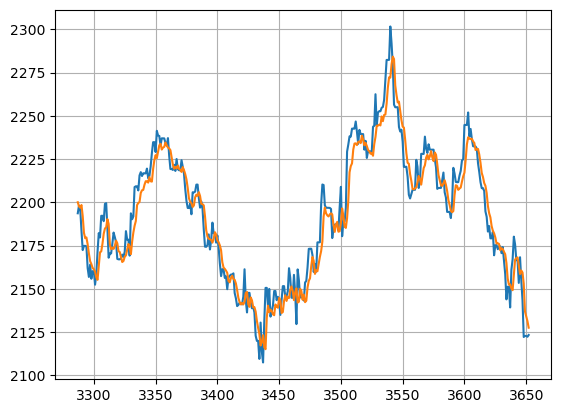

In [27]:
plot_series(time_valid, (series_valid, results))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 12ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the T

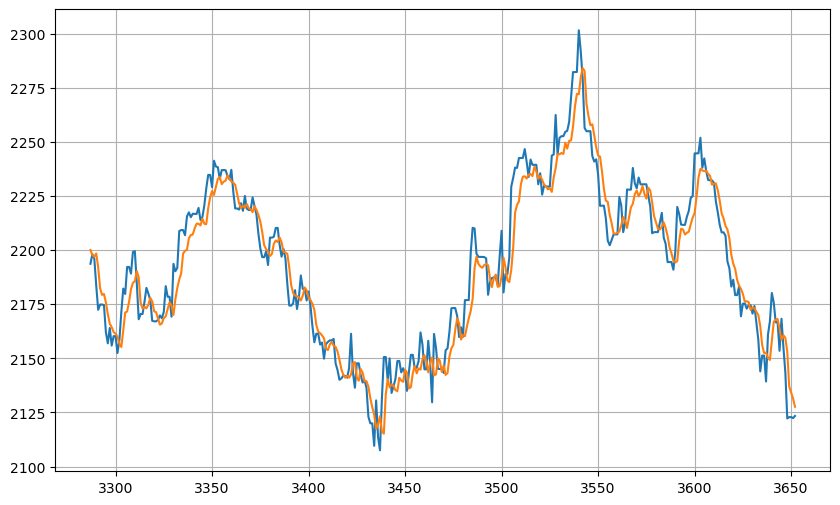

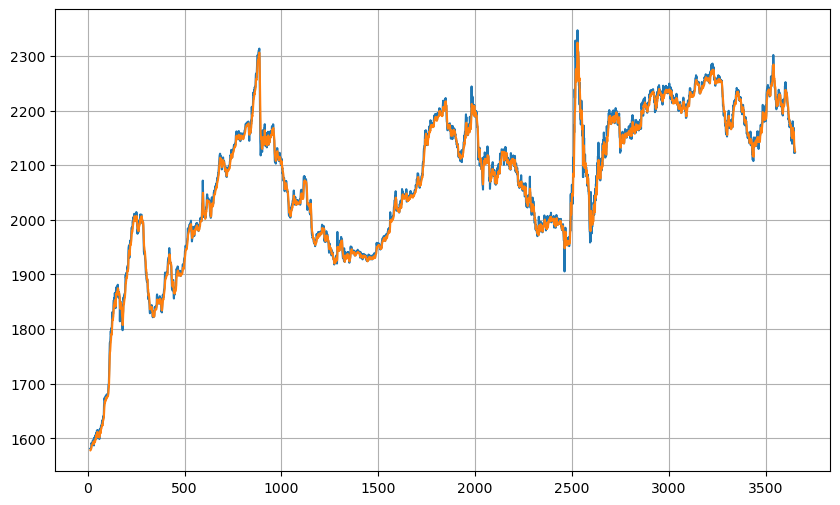

In [28]:
forecast_validator = evaluate_forecast(model, times, series, time_valid, series_valid,
                      SPLIT_TIME, -1, WINDOW_SIZE, BATCH_SIZE)

In [29]:
compute_metrics(series_valid, forecast_validator)

{'mae': 41.9058, 'mse': 2678.549, 'rmse': 49.95749, 'mape': 1.9102958}

In [31]:
into_future = 100

future_forecast = make_future_forecast(values=series,
                                       model=model,
                                       into_future=into_future,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [[2160.963846]
 [2167.103322]
 [2180.189295]
 [2175.728884]
 [2166.646358]
 [2166.64544 ]
 [2153.476973]
 [2168.304646]
 [2155.150279]
 [2143.414697]
 [2122.2306  ]
 [2122.847288]
 [2122.846296]
 [2122.366433]
 [2123.377747]] -> Prediction: 2125.07568359375

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [2167.103322   2180.189295   2175.728884   2166.646358   2166.64544
 2153.476973   2168.304646   2155.150279   2143.414697   2122.2306
 2122.847288   2122.846296   2122.366433   2123.377747   2125.07568359] -> Prediction: 2124.725830078125

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [2180.189295   2175.728884   2166.646358   2166.64544    2153.476973
 2168.304646   2155.150279   2143.414697   2122.2306     2122.847288
 2122.846296   2122.366433   2123.377747   2125.07568359 2124.72583008] -> Prediction: 2125.632568359375

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 25ms/step
Predicting on:
 [2120.21386719 2119.56835938 2118.47509766 2117.94360352 2117.38842773
 2116.64453125 2115.68457031 2114.81835938 2114.34838867 2114.04418945
 2112.94897461 2112.26416016 2111.46166992 2110.88110352 2110.13647461] -> Prediction: 2109.40673828125

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [2119.56835938 2118.47509766 2117.94360352 2117.38842773 2116.64453125
 2115.68457031 2114.81835938 2114.34838867 2114.04418945 2112.94897461
 2112.26416016 2111.46166992 2110.88110352 2110.13647461 2109.40673828] -> Prediction: 2108.7626953125

1/1 [==============================] - 0s 22ms/step
Predicting on:
 [2118.47509766 2117.94360352 2117.38842773 2116.64453125 2115.68457031
 2114.81835938 2114.34838867 2114.04418945 2112.94897461 2112.26416016
 2111.46166992 2110.88110352 2110.13647461 2109.40673828 2108.76269531] -> Prediction: 2107.9580078125

1/1 [==============================] - 0s 18ms/step
Predi

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [2101.56152344 2100.83227539 2100.12792969 2099.41015625 2098.68774414
 2097.99829102 2097.28295898 2096.56616211 2095.84643555 2095.14038086
 2094.43945312 2093.72363281 2093.01000977 2092.30444336 2091.59155273] -> Prediction: 2090.884521484375

1/1 [==============================] - 0s 28ms/step
Predicting on:
 [2100.83227539 2100.12792969 2099.41015625 2098.68774414 2097.99829102
 2097.28295898 2096.56616211 2095.84643555 2095.14038086 2094.43945312
 2093.72363281 2093.01000977 2092.30444336 2091.59155273 2090.88452148] -> Prediction: 2090.17431640625

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [2100.12792969 2099.41015625 2098.68774414 2097.99829102 2097.28295898
 2096.56616211 2095.84643555 2095.14038086 2094.43945312 2093.72363281
 2093.01000977 2092.30444336 2091.59155273 2090.88452148 2090.17431641] -> Prediction: 2089.4677734375

1/1 [==============================] - 0s 31ms/step
Pre

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [2083.09912109 2082.39257812 2081.68701172 2080.98095703 2080.27563477
 2079.56982422 2078.86523438 2078.16088867 2077.45605469 2076.75170898
 2076.04760742 2075.34423828 2074.640625   2073.93725586 2073.23461914] -> Prediction: 2072.531494140625

1/1 [==============================] - 0s 22ms/step
Predicting on:
 [2082.39257812 2081.68701172 2080.98095703 2080.27563477 2079.56982422
 2078.86523438 2078.16088867 2077.45605469 2076.75170898 2076.04760742
 2075.34423828 2074.640625   2073.93725586 2073.23461914 2072.53149414] -> Prediction: 2071.8291015625

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [2081.68701172 2080.98095703 2080.27563477 2079.56982422 2078.86523438
 2078.16088867 2077.45605469 2076.75170898 2076.04760742 2075.34423828
 2074.640625   2073.93725586 2073.23461914 2072.53149414 2071.82910156] -> Prediction: 2071.126953125

1/1 [==============================] - 0s 22ms/step
Predi

In [32]:
start_future = times[-1] + 1
future_time = np.arange(start_future, start_future + into_future)

# Insert last timestep/final price into next time steps and future forecasts so the plot connects
future_time = np.insert(future_time, 0, times[-1])
future_forecast = np.insert(future_forecast, 0, series[-1])

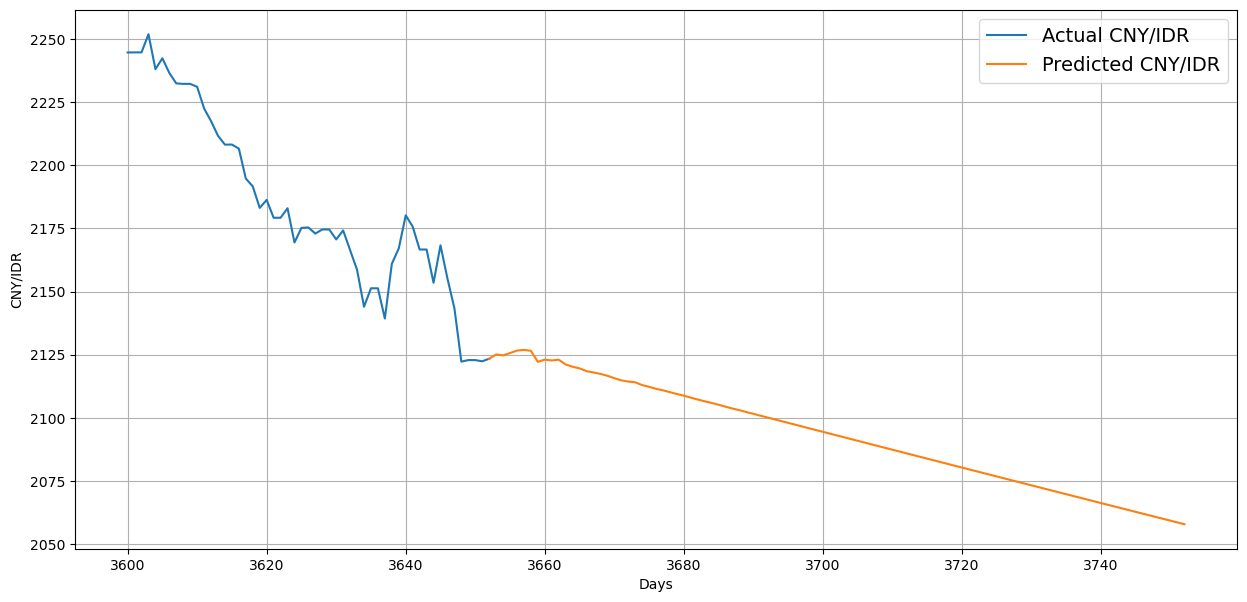

In [33]:
plt.figure(figsize=(15,7))
plot_future_forecast(times, series, start=3600, format="-", label="Actual CNY/IDR", xlabel="Days", ylabel="CNY/IDR")
plot_future_forecast(future_time, future_forecast, format="-", label="Predicted CNY/IDR", xlabel="Days", ylabel="CNY/IDR")